In [27]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from matplotlib import style
style.use("ggplot")

# Datan kuvaus

In [2]:
vpn_data = pd.read_hdf(r"/home/jailklee/Koneoppimismenetelmia/VNAT_Dataframe_release_1.h5")

In [3]:
vpn_data.head()

,connection,timestamps,sizes,directions,file_names
0,"(10.123.1.2, 1195, 10.123.1.1, 1195, 17)","[1563289706.330096, 1563289706.330207, 1563289...","[120, 88, 120, 88, 120, 88, 120, 120, 152, 120...","[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...",vpn_youtube_capture2.pcap
0,"(10.113.1.2, 22924, 10.115.1.2, 53, 17)","[1561391908.523659, 1561391908.524042]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
1,"(10.113.1.2, 53065, 10.115.1.2, 53, 17)","[1561391908.523706, 1561391908.524059]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap
2,"(10.113.1.150, 39816, 10.115.1.123, 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60, 60, 52, 73, 52, 73, 52, 1378, 222, 52, 13...","[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",nonvpn_sftp_newcapture1.pcap
3,"(10.115.1.2, 6589, 10.113.1.2, 53, 17)","[1561391908.594887, 1561391908.595301]","[51, 102]","[1, 0]",nonvpn_sftp_newcapture1.pcap


In [4]:
vpn_data.shape

(33711, 5)

In [5]:
type(vpn_data)

pandas.core.frame.DataFrame

In [6]:
vpn_data.describe()

,connection,timestamps,sizes,directions,file_names
count,33711,33711,33711,33711,33711
unique,32682,33710,2767,2248,165
top,"(10.117.1.2, 1195, 10.117.1.1, 1195, 17)","[1563316960.771979, 1563316960.774461, 1563316...","[63, 79]","[1, 0]",nonvpn_ssh_capture5.pcap
freq,32,2,6203,25569,11368


In [6]:
vpn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33711 entries, 0 to 0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   connection  33711 non-null  object
 1   timestamps  33711 non-null  object
 2   sizes       33711 non-null  object
 3   directions  33711 non-null  object
 4   file_names  33711 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


# There are no null values in the data

Don't need to do data cleaning with null values

In [7]:
vpn_data.isnull()

,connection,timestamps,sizes,directions,file_names
0,False,False,False,False,False
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
...,...,...,...,...,...
10,False,False,False,False,False
11,False,False,False,False,False
12,False,False,False,False,False
13,False,False,False,False,False


In [8]:
vpn_data[vpn_data.file_names == "nonvpn_sftp_newcapture1.pcap"]

,connection,timestamps,sizes,directions,file_names
0,"(10.113.1.2, 22924, 10.115.1.2, 53, 17)","[1561391908.523659, 1561391908.524042]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
1,"(10.113.1.2, 53065, 10.115.1.2, 53, 17)","[1561391908.523706, 1561391908.524059]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap
2,"(10.113.1.150, 39816, 10.115.1.123, 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60, 60, 52, 73, 52, 73, 52, 1378, 222, 52, 13...","[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",nonvpn_sftp_newcapture1.pcap
3,"(10.115.1.2, 6589, 10.113.1.2, 53, 17)","[1561391908.594887, 1561391908.595301]","[51, 102]","[1, 0]",nonvpn_sftp_newcapture1.pcap
4,"(10.115.1.2, 7384, 10.113.1.2, 53, 17)","[1561391908.595835, 1561391908.596233]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
...,...,...,...,...,...
704,"(10.115.1.2, 62590, 10.113.1.2, 53, 17)","[1561393049.753615, 1561393049.753969]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap
705,"(10.115.1.2, 36565, 10.113.1.2, 53, 17)","[1561393049.754948, 1561393049.755389]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
706,"(10.115.1.2, 37113, 10.113.1.2, 53, 17)","[1561393049.755005, 1561393049.75545]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap
707,"(10.115.1.2, 32851, 10.113.1.2, 53, 17)","[1561393049.755956, 1561393049.756347]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap


In [9]:
vpn_data.head(10)

,connection,timestamps,sizes,directions,file_names
0,"(10.123.1.2, 1195, 10.123.1.1, 1195, 17)","[1563289706.330096, 1563289706.330207, 1563289...","[120, 88, 120, 88, 120, 88, 120, 120, 152, 120...","[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...",vpn_youtube_capture2.pcap
0,"(10.113.1.2, 22924, 10.115.1.2, 53, 17)","[1561391908.523659, 1561391908.524042]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
1,"(10.113.1.2, 53065, 10.115.1.2, 53, 17)","[1561391908.523706, 1561391908.524059]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap
2,"(10.113.1.150, 39816, 10.115.1.123, 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60, 60, 52, 73, 52, 73, 52, 1378, 222, 52, 13...","[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",nonvpn_sftp_newcapture1.pcap
3,"(10.115.1.2, 6589, 10.113.1.2, 53, 17)","[1561391908.594887, 1561391908.595301]","[51, 102]","[1, 0]",nonvpn_sftp_newcapture1.pcap
4,"(10.115.1.2, 7384, 10.113.1.2, 53, 17)","[1561391908.595835, 1561391908.596233]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
5,"(10.113.1.2, 39193, 10.115.1.2, 53, 17)","[1561391908.597869, 1561391908.598052]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
6,"(10.113.1.2, 52599, 10.115.1.2, 53, 17)","[1561391908.597918, 1561391908.598108]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap
7,"(10.113.1.2, 19674, 10.115.1.2, 53, 17)","[1561391908.599293, 1561391908.599472]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap
8,"(10.113.1.2, 58193, 10.115.1.2, 53, 17)","[1561391908.599351, 1561391908.599529]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap


In [10]:
vpn_data.directions.info()

<class 'pandas.core.series.Series'>
Int64Index: 33711 entries, 0 to 0
Series name: directions
Non-Null Count  Dtype 
--------------  ----- 
33711 non-null  object
dtypes: object(1)
memory usage: 526.7+ KB


# Datan esikäsittely ja menetelmän esittely

In [3]:
vpn_data['directions'] = vpn_data['directions'].astype('str')
vpn_data['directionstotal'] = vpn_data['directions'].apply(lambda n: len(n.split(',')))

# Number of directions/file

In [4]:
vpn_data[['directions', 'directionstotal']]

,directions,directionstotal
0,"[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...",62283
0,"[1, 0]",2
1,"[1, 0]",2
2,"[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",2002346
3,"[1, 0]",2
...,...,...
10,[1],1
11,"[1, 0]",2
12,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, ...",24
13,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, ...",24


In [10]:
vpn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33711 entries, 0 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   connection       33711 non-null  object
 1   timestamps       33711 non-null  object
 2   sizes            33711 non-null  object
 3   directions       33711 non-null  object
 4   file_names       33711 non-null  object
 5   directionstotal  33711 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [11]:
vpn_data.head()

,connection,timestamps,sizes,directions,file_names,directionstotal
0,"(10.123.1.2, 1195, 10.123.1.1, 1195, 17)","[1563289706.330096, 1563289706.330207, 1563289...","[120, 88, 120, 88, 120, 88, 120, 120, 152, 120...","[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...",vpn_youtube_capture2.pcap,62283
0,"(10.113.1.2, 22924, 10.115.1.2, 53, 17)","[1561391908.523659, 1561391908.524042]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2
1,"(10.113.1.2, 53065, 10.115.1.2, 53, 17)","[1561391908.523706, 1561391908.524059]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2
2,"(10.113.1.150, 39816, 10.115.1.123, 22, 6)","[1561391908.524836, 1561391908.525027, 1561391...","[60, 60, 52, 73, 52, 73, 52, 1378, 222, 52, 13...","[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",nonvpn_sftp_newcapture1.pcap,2002346
3,"(10.115.1.2, 6589, 10.113.1.2, 53, 17)","[1561391908.594887, 1561391908.595301]","[51, 102]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2


# Next we calculate the total packet sizes

In [5]:
vpn_data['sizestotal'] = vpn_data['sizes']

In [6]:
i = 0
while (i < 33711):
    vpn_data.sizestotal.iloc[i] = np.sum(vpn_data.sizes.iloc[i])
    i = i + 1

In [14]:
vpn_data[100:110]

,connection,timestamps,sizes,directions,file_names,directionstotal,sizestotal
99,"(10.113.1.2, 47393, 10.115.1.2, 53, 17)","[1561392385.983136, 1561392385.983284]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,126
100,"(10.113.1.2, 31113, 10.115.1.2, 53, 17)","[1561392385.984302, 1561392385.98446]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,142
101,"(10.113.1.2, 52210, 10.115.1.2, 53, 17)","[1561392385.984372, 1561392385.984513]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,126
102,"(10.115.1.2, 9827, 10.113.1.2, 53, 17)","[1561392385.994696, 1561392385.995104]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,142
103,"(10.115.1.2, 52460, 10.113.1.2, 53, 17)","[1561392385.994754, 1561392385.995153]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,126
104,"(10.115.1.2, 64652, 10.113.1.2, 53, 17)","[1561392385.997229, 1561392385.997602]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,142
105,"(10.115.1.2, 3089, 10.113.1.2, 53, 17)","[1561392385.99731, 1561392385.997626]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,126
106,"(10.115.1.2, 37208, 10.113.1.2, 53, 17)","[1561392386.137728, 1561392386.138196]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,142
107,"(10.115.1.2, 28154, 10.113.1.2, 53, 17)","[1561392386.137791, 1561392386.13822]","[63, 63]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,126
108,"(10.115.1.2, 65416, 10.113.1.2, 53, 17)","[1561392386.156781, 1561392386.157207]","[63, 79]","[1, 0]",nonvpn_sftp_newcapture1.pcap,2,142


# Next we calculate the average packet size

In [7]:
vpn_data['average_package'] = vpn_data['sizestotal']

In [8]:
i = 0
while (i < 33711):
    vpn_data.average_package.iloc[i] = vpn_data.sizestotal.iloc[i]/vpn_data.directionstotal.iloc[i]
    i = i + 1

In [9]:
vpn_data['sizestotal'] = vpn_data['sizestotal'].astype(str).astype(int) # Change Dtype from object to int
vpn_data['average_package'] = vpn_data['average_package'].astype(str).astype(float) # Change Dtype from object to float

In [18]:
vpn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33711 entries, 0 to 0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   connection       33711 non-null  object 
 1   timestamps       33711 non-null  object 
 2   sizes            33711 non-null  object 
 3   directions       33711 non-null  object 
 4   file_names       33711 non-null  object 
 5   directionstotal  33711 non-null  int64  
 6   sizestotal       33711 non-null  int64  
 7   average_package  33711 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


<AxesSubplot:>

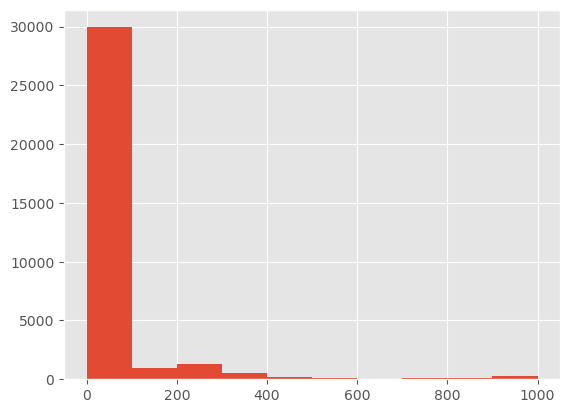

In [19]:
vpn_data['average_package'].hist(range=[0, 1000], align='mid')

<AxesSubplot:>

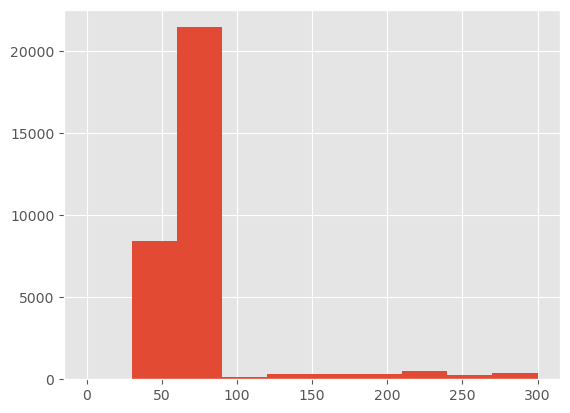

In [20]:
vpn_data['average_package'].hist(range=[0, 300], align='mid')

<AxesSubplot:>

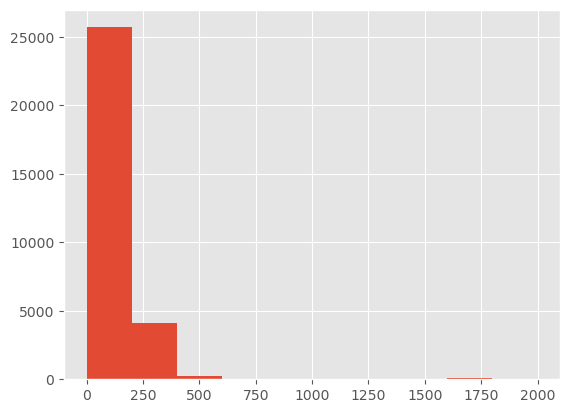

In [21]:
vpn_data['sizestotal'].hist(range=[0, 2000], align='mid')

<AxesSubplot:>

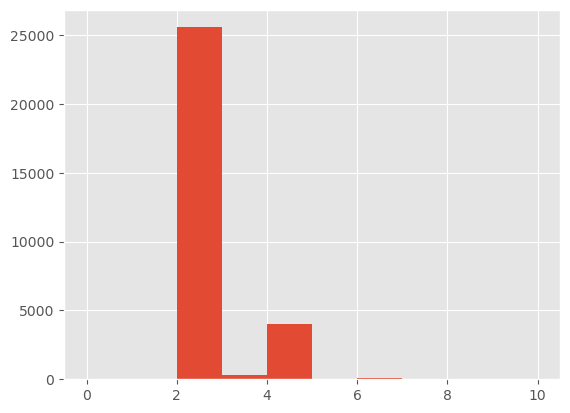

In [22]:
vpn_data['directionstotal'].hist(range=[0, 10], align='mid')

In [10]:
vpn_data['remove_numbers'] = vpn_data['file_names']

In [11]:
index = 0
while (index < 33711):
    vpn_data.remove_numbers.iloc[index] = ''.join([i for i in vpn_data.remove_numbers.iloc[index] if not i.isdigit()])
    vpn_data.remove_numbers.iloc[index] = ((vpn_data.remove_numbers.iloc[index]).replace('_',''))
    vpn_data.remove_numbers.iloc[index] = ((vpn_data.remove_numbers.iloc[index]).replace('nonvpn',''))
    vpn_data.remove_numbers.iloc[index] = ((vpn_data.remove_numbers.iloc[index]).replace('new',''))
    vpn_data.remove_numbers.iloc[index] = ((vpn_data.remove_numbers.iloc[index]).replace('long',''))
    index = index + 1

In [14]:
pd.set_option('display.max_rows', 500)
grp = vpn_data.groupby('remove_numbers')
total_directions = grp['directionstotal'].agg(np.mean)
cleaner_files = grp['remove_numbers'].count()
average_package = grp['average_package'].agg(np.mean)
average_traffic_totalsize = grp['sizestotal'].agg(np.mean)

print("How many captures were there?")
print(cleaner_files)

print("\n-----------------------------")
print("The size of the average package from the traffic:")
print(round(average_package, 2))

print("\n-----------------------------")
print("Mean of the total directions of traffic:")
print(round(total_directions, 2))

print("\n-----------------------------")
print("The total size of the average traffic:")
print(round(average_traffic_totalsize, 2))

How many captures were there?
remove_numbers
netflixcapture.pcap         204
rsynccapture.pcap          1911
scpcapture.pcap           12843
sftpcapture.pcap           1666
skype-chatcapture.pcap     1244
sshcapture.pcap           13558
vimeocapture.pcap          1217
voipcapture.pcap            318
youtubecapture.pcap         338
Name: remove_numbers, dtype: int64

-----------------------------
The size of the average package from the traffic:
remove_numbers
netflixcapture.pcap       437.75
rsynccapture.pcap          73.55
scpcapture.pcap            88.89
sftpcapture.pcap           71.62
skype-chatcapture.pcap    232.63
sshcapture.pcap            68.41
vimeocapture.pcap         323.87
voipcapture.pcap           74.86
youtubecapture.pcap       346.85
Name: average_package, dtype: float64

-----------------------------
Mean of the total directions of traffic:
remove_numbers
netflixcapture.pcap       3765.19
rsynccapture.pcap          649.04
scpcapture.pcap           1086.04
sftpcapture.

In [13]:
vpn_data = vpn_data[vpn_data["remove_numbers"].str.contains("vpnnetflixcapture.pcap|vpnrdpcapture.pcap|vpnrsynccapture.pcap|vpnscpcapture.pcap|vpnsftpcapture.pcap|vpnsshcapture.pcap|vpnvimeocapture.pcap|vpnyoutubecapture.pcap|rdpcapture.pcap|vpnskype-chatcapture.pcap|vpnvoipcapture.pcap") == False]

# I removed some traffic categories, which didn't have enough data. For example, the VPN traffic only had a few captures. Out of 33,711 captures, I'm using 33,299 for the ML model.

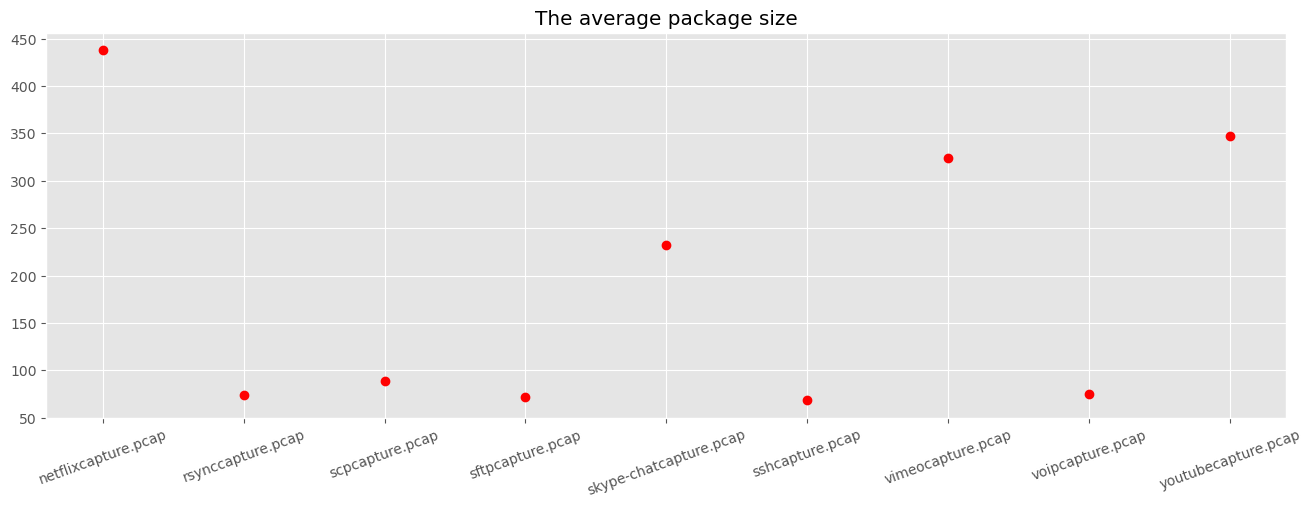

In [28]:
plt.figure(figsize=(16,5))
plt.plot(average_package, 'ro')
plt.xticks(rotation=20)
plt.title('The average package size')
plt.show()

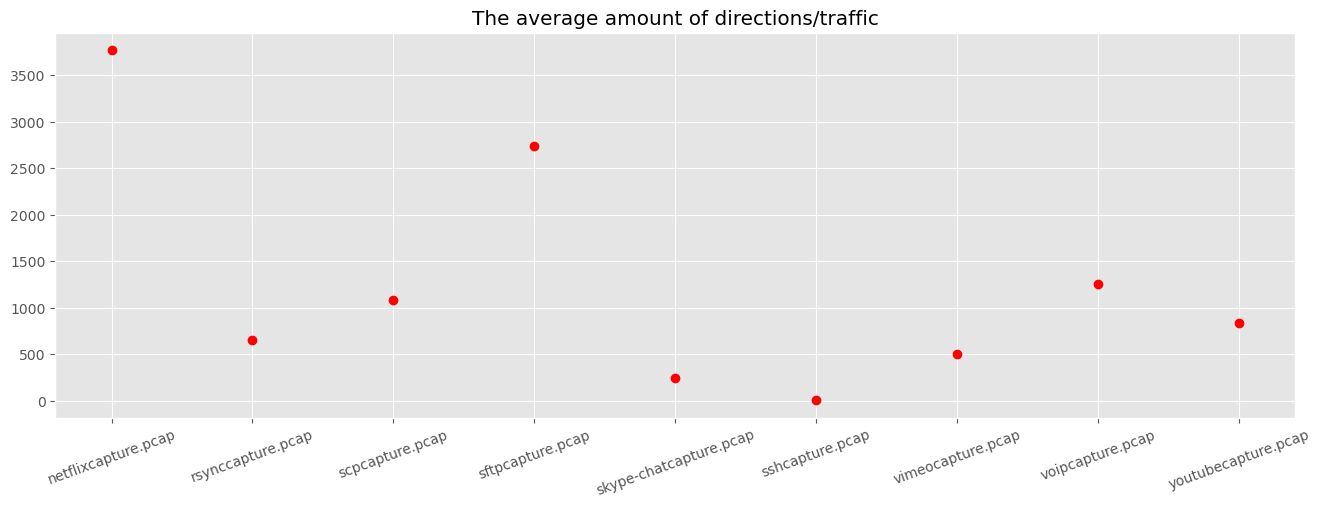

In [29]:
plt.figure(figsize=(16,5))
plt.plot(total_directions, 'ro')
plt.xticks(rotation=20)
plt.title('The average amount of directions/traffic')
plt.show()

In [15]:
vpn_data.shape

(33299, 9)

In [16]:
vpn_data['category'] = vpn_data['directionstotal']

In [17]:
i = 0
while (i < 33299):
    if vpn_data.remove_numbers.iloc[i] == ("netflixcapture.pcap") or vpn_data.remove_numbers.iloc[i] == ("vimeocapture.pcap") or vpn_data.remove_numbers.iloc[i] == ("youtubecapture.pcap"):
        vpn_data.category.iloc[i] = 1
    elif vpn_data.remove_numbers.iloc[i] == ("skype-chatcapture.pcap"):
        vpn_data.category.iloc[i] = 2
    else:
        vpn_data.category.iloc[i] = 3
    i = i + 1

# Categories: 1. Streaming 2. Video Chat 3. C2, File transfer, VoIP

# Toteutuksen esittely

In [18]:
ml_data = vpn_data[['average_package','directionstotal']].copy()
mlc_data = vpn_data[['category']].copy()

In [33]:
X = ml_data.to_numpy()
y = mlc_data.to_numpy()
y = np.reshape(y, (33299,))

In [ ]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30,)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()